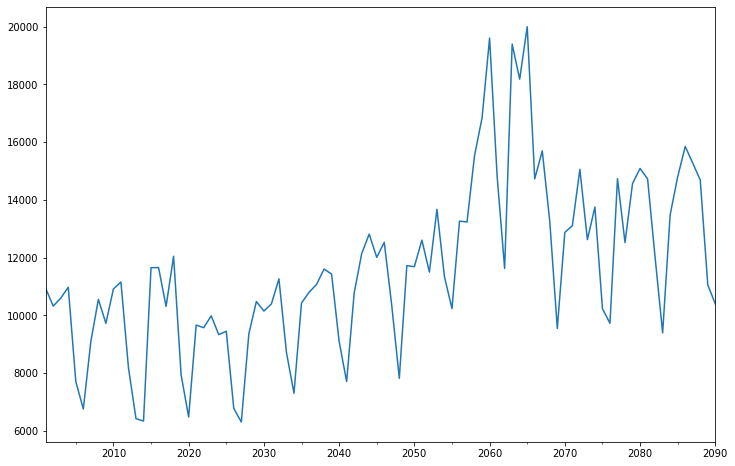

In [3]:
import pandas as pd
import numpy as np
from scipy import  stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
# 1数据准备
dta=[10930,10318,10595,10972,7706,6756,9092,10551,9722,10913,11151,
     8186,6422,6337,11649,11652,10310,12043,7937,6476,9662,9570,
     9981,9331,9449,6773,6304,9355,10477,10148,10395,11261,8713,7299,
     10424,10795,11069,11602,11427,9095,7707,10767,12136,12812,12006,
     12528,10329,7818,11719,11683,12603,11495,13670,11337,10232,13261,
     13230,15535,16837,19598,14823,11622,19391,18177,19994,14723,15694,
     13248,9543,12872,13101,15053,12619,13749,10228,9725,14729,12518,14564,
     15085,14722,11999,9390,13481,14795,15845,15271,14686,11054,10395]
dta=np.array(dta,dtype=np.float)
dta=pd.Series(dta)#dta=pd.tseries(dta)
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('2001','2090'))
#应该是2090，不是2100
dta.plot(figsize=(12,8)) 
plt.show()


DatetimeIndex(['2001-12-31', '2002-12-31', '2003-12-31', '2004-12-31',
               '2005-12-31', '2006-12-31', '2007-12-31', '2008-12-31',
               '2009-12-31', '2010-12-31', '2011-12-31', '2012-12-31',
               '2013-12-31', '2014-12-31', '2015-12-31', '2016-12-31',
               '2017-12-31', '2018-12-31', '2019-12-31', '2020-12-31',
               '2021-12-31', '2022-12-31', '2023-12-31', '2024-12-31',
               '2025-12-31', '2026-12-31', '2027-12-31', '2028-12-31',
               '2029-12-31', '2030-12-31', '2031-12-31', '2032-12-31',
               '2033-12-31', '2034-12-31', '2035-12-31', '2036-12-31',
               '2037-12-31', '2038-12-31', '2039-12-31', '2040-12-31',
               '2041-12-31', '2042-12-31', '2043-12-31', '2044-12-31',
               '2045-12-31', '2046-12-31', '2047-12-31', '2048-12-31',
               '2049-12-31', '2050-12-31', '2051-12-31', '2052-12-31',
               '2053-12-31', '2054-12-31', '2055-12-31', '2056-12-31',
      

In [ ]:
# 2时间序列的差分
dfig = plt.figure(figsize=(12,8))
ax1= fig.add_subplot(111)
diff1 = dta.diff(1)diff1.plot(ax=ax1)
## 3合适的p,q
# 3.1检查平稳时间序列的自相关图和偏自相关图d
iff1= dta.diff(1)
#我们已经知道要使用一阶差分的时间序列，之前判断差分的程序可以注释掉
fig = plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta,lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta,lags=40,ax=ax2)
# 3.2模型选择
arma_mod70 = sm.tsa.ARMA(dta,(7,0)).fit()
print(arma_mod70.aic,arma_mod70.bic,arma_mod70.hqic)
arma_mod30 = sm.tsa.ARMA(dta,(0,1)).fit()
print(arma_mod30.aic,arma_mod30.bic,arma_mod30.hqic)
arma_mod71 = sm.tsa.ARMA(dta,(7,1)).fit()
print(arma_mod71.aic,arma_mod71.bic,arma_mod71.hqic)
arma_mod80 = sm.tsa.ARMA(dta,(8,0)).fit()
print(arma_mod80.aic,arma_mod80.bic,arma_mod80.hqic)
# 3.3 检验残差序列
resid = arma_mod80.resid
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40, ax=ax2)plt.show()
#D-W检验，是目前检验自相关性最常用的方法，但它只使用于检验一阶自相关性
#当DW值显著的接近于0或４时，则存在自相关性，而接近于２时，则不存在（一阶）自相关性。
print(sm.stats.durbin_watson(arma_mod80.resid.values))
# 3.4 观察是否正太分布
print(stats.normaltest(resid))
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line='q', ax=ax, fit=True)
#plt.show()
# 3.5残差序列Ljung-Box检验，也叫Q检验
r,q,p = sm.tsa.acf(resid.values.squeeze(), qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag')) 
predict_dta = arma_mod80.predict('2090', '2100', dynamic=True)
print(predict_dta)


In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pylab as plt 

In [12]:
df = pd.read_csv('D:/Dataset/AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [13]:
df['Month'] = pd.to_datetime(df['Month'],format='%Y-%m')
df = df.set_index('Month')
df = df.rename(columns={'#Passengers':'Passengers'})
ts = df['Passengers']

#### 检验时间序列的稳定性
- 常量的均值
- 常量的方差
- 与时间独立的自协方差

In [16]:
def draw_trend(timeseries, size):
    f = plt.figure(facecolor='white')
    rol_mean = timeseries.rolling(window=size).mean()
    rol_std = timeseries.rolling(window=size).std()
    timeseries.plot(color='blue', label='Original')
    rol_mean.plot(color='red', label='Rolling Mean')
    rol_std.plot(color='black', label='Rolling standard deviation')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
def draw_ts(timeseries):
    f = plt.figure(facecolor='white')
    timeseries.plot(color='blue')
    plt.show()
#Dickey-Fuller test:
def teststationarity(ts):
    dftest = sm.tsa.adfuller(ts)    # 对上述函数求得的值进行语义描述
    dfoutput = pd.Series(dftest[0:4], 
                         index=['Test Statistic','p-value',
                                '#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return dfoutput

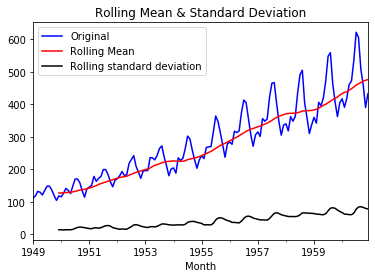

In [14]:
draw_trend(ts,12)
#通过下图，我们可以发现数据的移动平均值/标准差有越来越大的趋势，是不稳定的。

In [17]:
teststationarity(ts)
#此时p值为0.991880，说明并不能拒绝原假设。通过DF的数据可以明确的看出，
#在任何置信度下，数据都不是稳定的。

Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64

#### 处理时间序列为平稳

数据不稳定的原因主要有以下两点：
- 趋势（trend）-数据随着时间变化。比如说升高或者降低。
- 季节性(seasonality)-数据在特定的时间段内变动。比如说节假日，或者活动导致数据的异常

##### 对数变化

减少数据的振幅

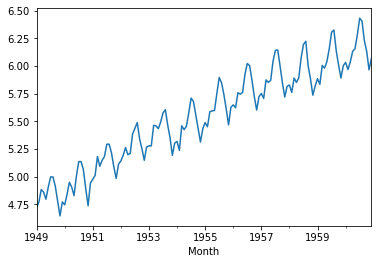

In [18]:
ts_log = np.log(ts)
ts_log.plot()

##### 平滑法

平滑法具体分为移动平均法和指数平均法。

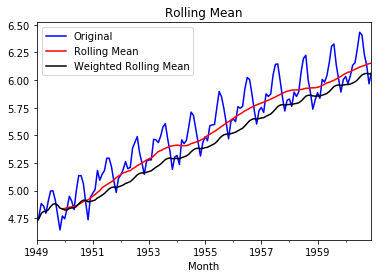

In [20]:
def draw_moving(timeSeries, size):
    f = plt.figure(facecolor='white')    # 对size个数据进行移动平均
    rol_mean = timeSeries.rolling(window=size).mean() 
    # 对size个数据进行加权移动平均
    rol_weighted_mean=timeSeries.ewm(halflife=size,min_periods=0,
                                     adjust=True,ignore_na=False).mean()
    timeSeries.plot(color='blue', label='Original')
    rol_mean.plot(color='red', label='Rolling Mean')
    rol_weighted_mean.plot(color='black', label='Weighted Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show()

draw_moving(ts_log,12)

##### 差分

时间序列最常用来剔除周期性因素的方法当属差分了，它主要是对等周期间隔的数据进行线性求减。

In [21]:
diff_12 = ts_log.diff(12)
diff_12.dropna(inplace=True)
diff_12_1 = diff_12.diff(1)
diff_12_1.dropna(inplace=True)
teststationarity(diff_12_1)
#从上面的统计检验结果可以看出，经过12阶差分和1阶差分后，该序列满足平稳性的要求了。

Test Statistic                  -4.443325
p-value                          0.000249
#Lags Used                      12.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64

##### 分解

它主要将时序数据分离成长期趋势、季节趋势和随机成分。statsmodels也支持两类分解模型，加法模型和乘法模型，乘法只需将model的参数设置为"multiplicative"。

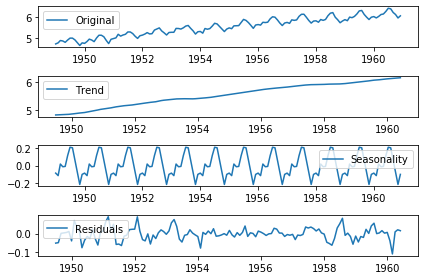

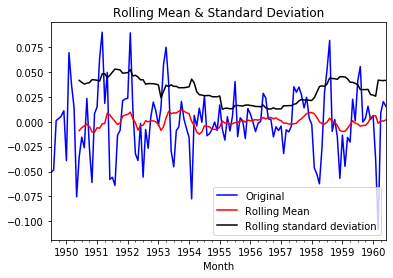

Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
def decompose(timeseries):        

    decomposition = seasonal_decompose(timeseries)
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    plt.subplot(411)
    plt.plot(ts_log, label='Original')
    plt.legend(loc='best') 
    plt.subplot(412)  
    plt.plot(trend, label='Trend')  
    plt.legend(loc='best')  
    plt.subplot(413) 
    plt.plot(seasonal,label='Seasonality') 
    plt.legend(loc='best')  
    plt.subplot(414)  
    plt.plot(residual, label='Residuals')  
    plt.legend(loc='best')  
    plt.tight_layout()   
    plt.show()   
    return trend , seasonal, residual

trend , seasonal, residual = decompose(ts_log)
residual.dropna(inplace=True)
draw_trend(residual,12)
teststationarity(residual)

#### 时间数据的预测

In [36]:
diff_1 = ts_log.diff(1).dropna()
diff_12 = diff_1.diff(12).dropna()
teststationarity(diff_12)

Test Statistic                  -4.443325
p-value                          0.000249
#Lags Used                      12.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64

In [44]:
ts_log.index.freq = 'MS'

In [24]:
rol_mean = ts_log.rolling(window=12).mean()
rol_mean.dropna(inplace=True)
ts_diff_1 = rol_mean.diff(1)
ts_diff_1.dropna(inplace=True)
teststationarity(ts_diff_1)

Test Statistic                  -2.709577
p-value                          0.072396
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64

In [25]:
ts_diff_2 = ts_diff_1.diff(1)
ts_diff_2.dropna(inplace=True)
teststationarity(ts_diff_2)

Test Statistic                  -4.443325
p-value                          0.000249
#Lags Used                      12.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64

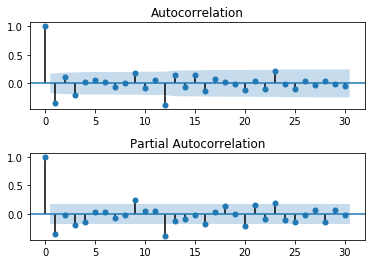

In [27]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
def draw_acf_pacf(ts,lags): 
    f = plt.figure(facecolor='white')
    ax1 = f.add_subplot(211) 
    plot_acf(ts,ax=ax1,lags=lags)
    ax2 = f.add_subplot(212)  
    plot_pacf(ts,ax=ax2,lags=lags)  
    plt.subplots_adjust(hspace=0.5)  
    plt.show()
    
draw_acf_pacf(ts_diff_2,30)

In [28]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ts_diff_1, order=(1,1,1)) 
result_arima = model.fit(disp=-1, method='css')
predict_ts = result_arima.predict()

d:\softwares\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
d:\softwares\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [48]:
model1 = sm.tsa.arima.ARIMA(ts_log, seasonal_order=(1,1,1,12))
model1 = model1.fit()
predicts = model1.predict()

In [56]:
# 一阶差分还原d
diff_shift_ts = ts_diff_1.shift(1)
diff_recover_1 = predict_ts.add(diff_shift_ts)
# 再次一阶差分还原
rol_shift_ts = rol_mean.shift(1)
diff_recover = diff_recover_1.add(rol_shift_ts)
# 移动平均还原
rol_sum = ts_log.rolling(window=11).sum()
rol_recover = diff_recover*12 - rol_sum.shift(1)
# 对数还原
log_recover = np.exp(rol_recover)
log_recover.dropna(inplace=True)

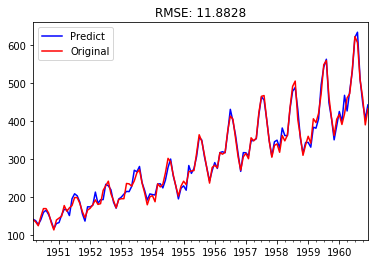

In [57]:
ts = ts[log_recover.index] 
# 过滤没有预测的记录
plt.figure(facecolor='white')
log_recover.plot(color='blue', label='Predict')
ts.plot(color='red', label='Original')
plt.legend(loc='best')
plt.title('RMSE: %.4f'% np.sqrt(
    sum((log_recover-ts)**2)/ts.size))
plt.show()

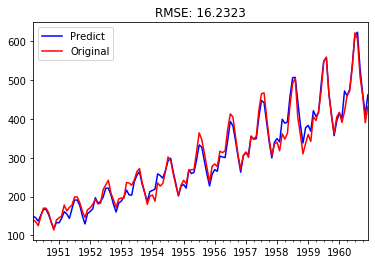

In [71]:
model1 = sm.tsa.arima.ARIMA(ts_log,seasonal_order=(1,1,1,12),trend='ct')
model1 = model1.fit()
predicts = model1.predict()
log_recover = np.exp(predicts)
log_recover = log_recover[ts.index] 
# 过滤没有预测的记录
plt.figure(facecolor='white')
log_recover.plot(color='blue', label='Predict')
ts.plot(color='red', label='Original')
plt.legend(loc='best')
plt.title('RMSE: %.4f'% np.sqrt(
    sum((log_recover-ts)**2)/ts.size))
plt.show()

Month
1949-01-01      NaN
1949-02-01      NaN
1949-03-01      NaN
1949-04-01      NaN
1949-05-01      NaN
              ...  
1960-08-01    606.0
1960-09-01    508.0
1960-10-01    461.0
1960-11-01    390.0
1960-12-01    432.0
Freq: MS, Name: Passengers, Length: 144, dtype: float64

ARIMA的建模过程如下：
- 获取被观测系统时间序列数据；
- 对数据绘图，观测是否为平稳时间序列；对于非平稳时间序列要先进行d阶差分运算，化为平稳时间序列；
- 经过第二步处理，已经得到平稳时间序列。要对平稳时间序列分别求得其自相关系数ACF 和偏自相关系数PACF，通过对自相关图和偏自相关图的分析，得到最佳的阶层 p 和阶数 q
- 由以上得到的d、q、p，得到ARIMA模型。然后开始对得到的模型进行模型检验。

In [ ]:
sm.tsa.arima.ARIMA